In [1]:
!pip3 install  visualkeras
!pip3 install ann_visualizer
!pip3 install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.3/992.3 KB 2.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=7cf6c65dfeb27632ef58448ef8a11e5a002ccebe9ff64ae5f9e670584ff8957c
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann_visualizer


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.xception import Xception
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
import tensorflow.keras.backend as K

In [4]:
train_path = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/train/"
test_path = "/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test/"

In [5]:
numberOfClass = len(glob(train_path+"/*")) 
print("Número de Classes: ",numberOfClass)

Número de Classes:  4


In [6]:
def sampleImage(sampe_image_path):
  img = load_img(train_path + sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

(271, 361, 3)


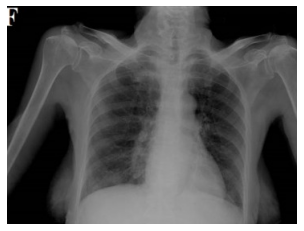

In [7]:
sample_image_path = "COVID19/COVID19(16).jpg"
sampleImage(sample_image_path)

(1662, 1774, 3)


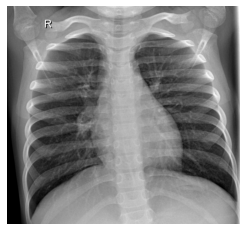

In [8]:
sample_image_path = "NORMAL/NORMAL2-IM-0931-0001.jpeg"
sampleImage(sample_image_path)

(784, 1280, 3)


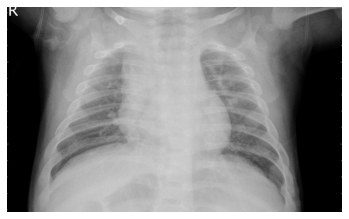

In [9]:
sample_image_path = "PNEUMONIA/person1018_virus_1706.jpeg"
sampleImage(sample_image_path)

(512, 512, 3)


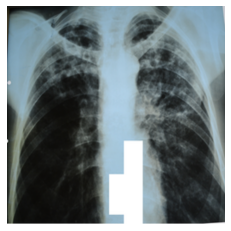

In [10]:
sample_image_path = "TURBERCULOSIS/Tuberculosis-441.png"
sampleImage(sample_image_path)

In [11]:
labels = ['COVID19','NORMAL','PNEUMONIA','TURBERCULOSIS']

In [12]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 41/41 [00:00<00:00, 60.30it/s]


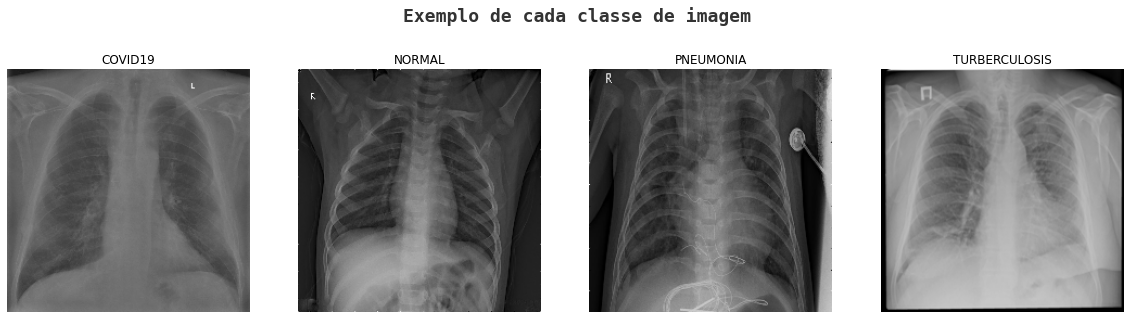

In [13]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Exemplo de cada classe de imagem',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [14]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [15]:
X_train.shape

(7097, 224, 224, 3)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [18]:
DenseNet = Xception(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

2022-04-30 19:31:27.251245: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 19:31:27.373502: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 19:31:27.374224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 19:31:27.375369: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


In [19]:
DenseNet.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

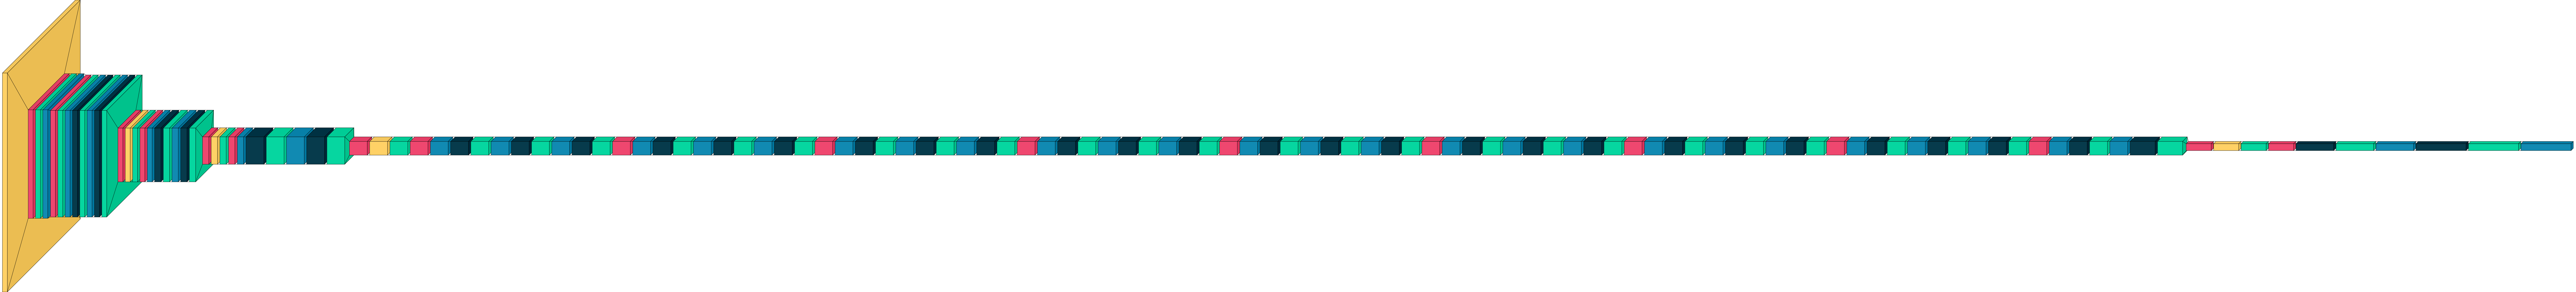

In [20]:
visualkeras.layered_view(DenseNet)

In [21]:
model = DenseNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(numberOfClass,activation='softmax')(model)
model = tf.keras.models.Model(inputs=DenseNet.input, outputs = model)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

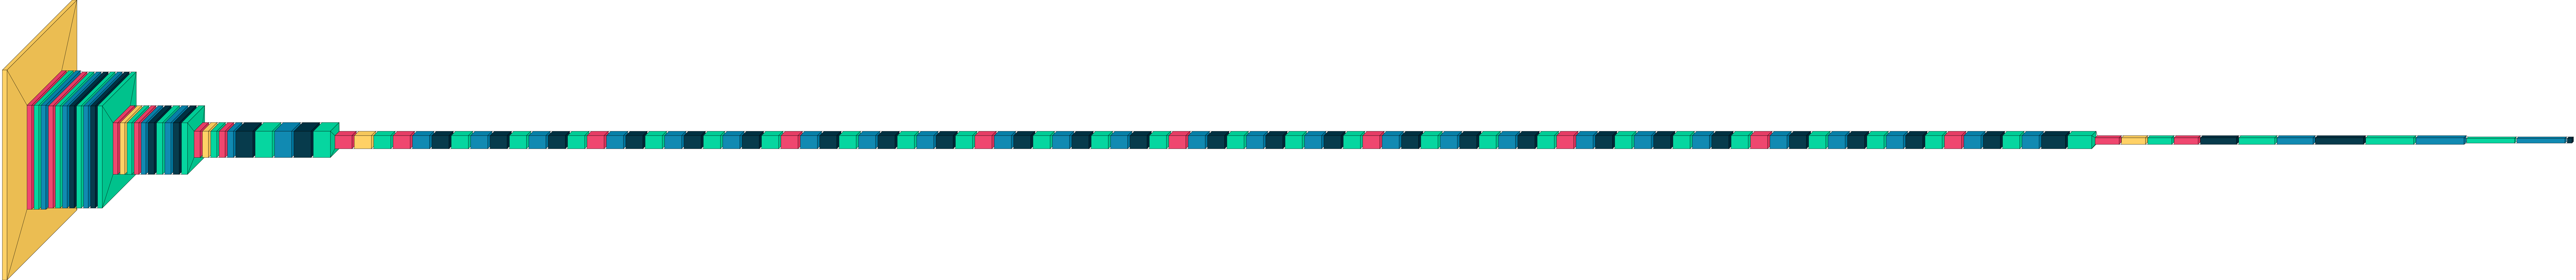

In [23]:
visualkeras.layered_view(model)

In [24]:
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [25]:
METRICS = [
            tf.keras.metrics.BinaryAccuracy(name='acuracia'),
            tf.keras.metrics.Precision(name='precisão'),
            tf.keras.metrics.Recall(name='recall'),  
            tf.keras.metrics.AUC(name='auc'),
            #tfa.metrics.F1Score(num_classes=4)
            f1_score
           ]

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam', 
              metrics=METRICS)

In [27]:
tensorboard = TensorBoard(log_dir = 'logs')
#checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
'''reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',verbose=1)
'''

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.01 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.1, 5)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

2022-04-30 19:31:32.823657: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-30 19:31:32.824287: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-30 19:31:32.826704: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-04-30 19:31:32.952740: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-30 19:31:32.952942: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [28]:
history = model.fit(X_train,
                 y_train,
                 validation_split=0.1, 
                 epochs =100, 
                 verbose=1, 
                 batch_size=32,
                  callbacks=[tensorboard,lr_scheduler]
                 )

2022-04-30 19:31:33.109892: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 865234944 exceeds 10% of free system memory.
2022-04-30 19:31:34.076624: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 865234944 exceeds 10% of free system memory.
2022-04-30 19:31:34.772452: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-30 19:31:39.622790: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/180 [..............................] - ETA: 33:58 - loss: 1.4249 - acuracia: 0.7422 - precisão: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5186 - f1_score: 0.0000e+00

2022-04-30 19:31:46.330314: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-30 19:31:46.330383: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/180 [..............................] - ETA: 1:53 - loss: 11.2813 - acuracia: 0.7383 - precisão: 0.2000 - recall: 0.0156 - auc: 0.5514 - f1_score: 0.0278            

2022-04-30 19:31:46.853195: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-30 19:31:46.854656: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-04-30 19:31:46.997484: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 1228 callback api events and 1221 activity events. 
2022-04-30 19:31:47.024873: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-30 19:31:47.064669: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/plugins/profile/2022_04_30_19_31_47

2022-04-30 19:31:47.083458: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_04_30_19_31_47/496fb3cb210e.trace.json.gz
2022-04-30 19:31:47.138362: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/train/pl

180/180 [==============================] - 82s 397ms/step - loss: 3.1619 - acuracia: 0.7901 - precisão: 0.5938 - recall: 0.5073 - auc: 0.7688 - f1_score: 0.5279 - val_loss: 1248006.6250 - val_acuracia: 0.5532 - val_precisão: 0.1064 - val_recall: 0.1064 - val_auc: 0.4043 - val_f1_score: 0.1065
Epoch 2/100
180/180 [==============================] - 70s 387ms/step - loss: 1.6741 - acuracia: 0.7960 - precisão: 0.5931 - recall: 0.5865 - auc: 0.7746 - f1_score: 0.5884 - val_loss: 1021.5255 - val_acuracia: 0.8020 - val_precisão: 0.6041 - val_recall: 0.6041 - val_auc: 0.7362 - val_f1_score: 0.6042
Epoch 3/100
180/180 [==============================] - 69s 381ms/step - loss: 1.5183 - acuracia: 0.7982 - precisão: 0.5965 - recall: 0.5964 - auc: 0.7772 - f1_score: 0.5963 - val_loss: 1.2108 - val_acuracia: 0.8020 - val_precisão: 0.6041 - val_recall: 0.6041 - val_auc: 0.7773 - val_f1_score: 0.6042
Epoch 4/100
180/180 [==============================] - 70s 386ms/step - loss: 1.1374 - acuracia: 0.8005

In [29]:
results = model.evaluate(X_train,y_train)

2022-04-30 21:26:32.007324: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 961422336 exceeds 10% of free system memory.
2022-04-30 21:26:32.970478: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 961422336 exceeds 10% of free system memory.


200/200 [==============================] - 15s 74ms/step - loss: 1.0556 - acuracia: 0.8017 - precisão: 0.6034 - recall: 0.6034 - auc: 0.7974 - f1_score: 0.6037


In [30]:
#results2 = model.evaluate(X_test,y_test)

In [31]:
print(history.history.keys())

dict_keys(['loss', 'acuracia', 'precisão', 'recall', 'auc', 'f1_score', 'val_loss', 'val_acuracia', 'val_precisão', 'val_recall', 'val_auc', 'val_f1_score', 'lr'])


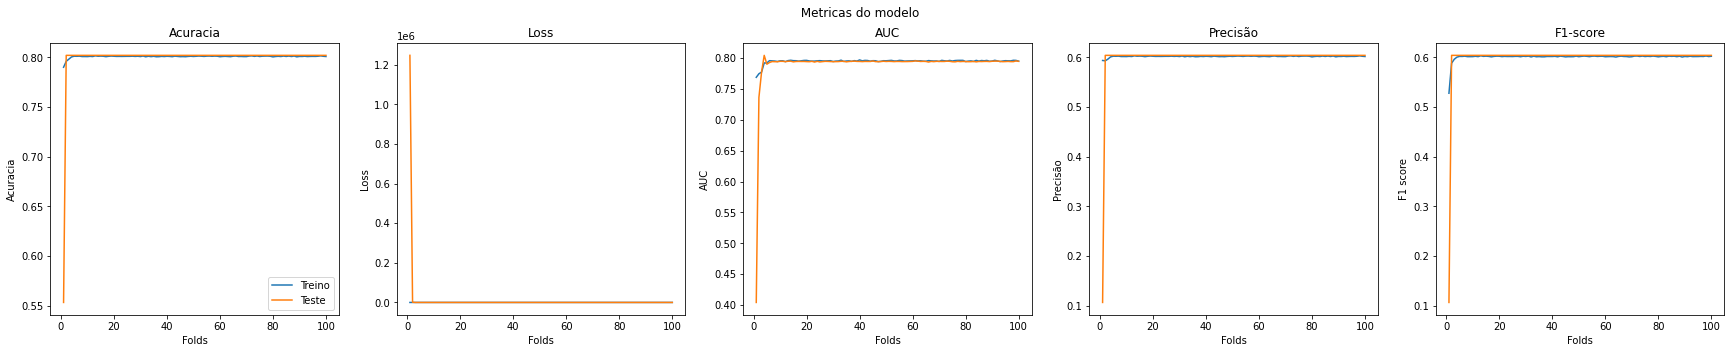

In [32]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (30,5))
    fig.suptitle(" Metricas do modelo ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Acuracia')
    ax1.set_xlabel('Folds')
    ax1.set_ylabel('Acuracia')
    ax1.legend(['Treino', 'Teste'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Loss')
    ax2.set_xlabel('Folds')
    ax2.set_ylabel('Loss')
    ax1.legend(['Treino', 'Teste'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('AUC')
    ax3.set_xlabel('Folds')
    ax3.set_ylabel('AUC')
    ax1.legend(['Treino', 'Teste'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('Precisão')
    ax4.set_xlabel('Folds')
    ax4.set_ylabel('Precisão')
    ax1.legend(['Treino', 'Teste'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('F1-score')
    ax5.set_xlabel('Folds')
    ax5.set_ylabel('F1 score')
    ax1.legend(['Treino', 'Teste'])


    plt.show()
    

Train_Val_Plot(history.history['acuracia'],history.history['val_acuracia'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precisão'],history.history['val_precisão'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [34]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.00      0.00      0.00       174
           2       0.58      1.00      0.73       411
           3       0.00      0.00      0.00        64

    accuracy                           0.58       710
   macro avg       0.14      0.25      0.18       710
weighted avg       0.34      0.58      0.42       710



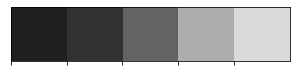

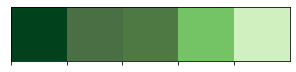

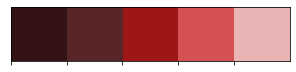

In [35]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

[[  0   0  61   0]
 [  0   0 174   0]
 [  0   0 411   0]
 [  0   0  64   0]]


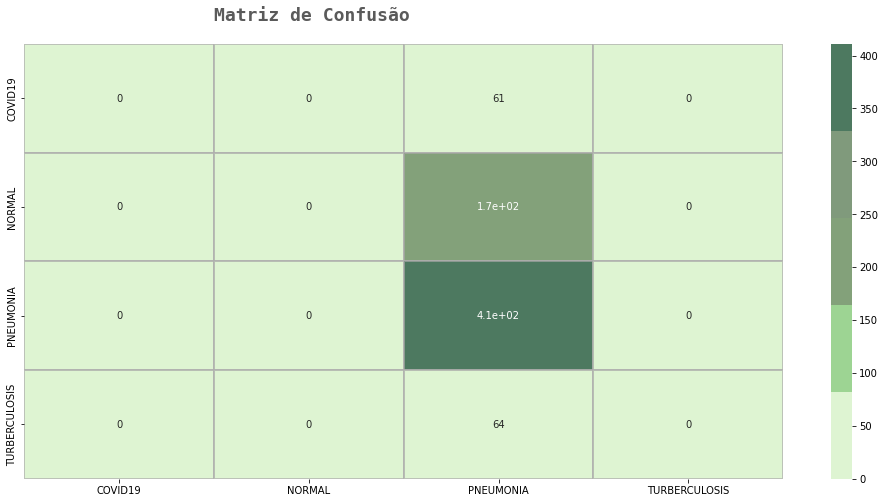

In [36]:
fig,ax=plt.subplots(1,1,figsize=(17,8))

sns.heatmap(confusion_matrix(y_test_new,pred),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Matriz de Confusão',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(y_test_new,pred))
plt.show()